In [2]:
#from urllib.request import urlopen
import spacy
from spacy.cli import link
from spacy.util import get_package_path
from gensim.models import LsiModel

model_name = "de_core_news_sm"
package_path = get_package_path(model_name)
link(model_name, model_name, force=True, model_path=package_path)
nlp = spacy.load("de_core_news_sm")

import operator
import numpy as np
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim import corpora, models
from pprint import pprint
import seaborn as sns
import pyLDAvis.gensim
pd.set_option('display.max_colwidth', 80)
pd.options.display.max_columns=500
import glob

✔ Linking successful
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\de_core_news_sm
-->
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\spacy\data\de_core_news_sm
You can now load the model via spacy.load('de_core_news_sm')


In [16]:
newdf = pd.concat([pd.read_csv(f,sep=";",header="infer", encoding ="UTF-8") for f in glob.glob(r"../out/Polizeiberichte_transformed*.csv")], sort = True)

In [17]:
dataset = newdf

In [18]:
df = pd.Series(np.concatenate([x.split() for x in dataset.Hauptartikel])).value_counts()
dataset = pd.DataFrame(df)
dataset["Word"] = df.index.tolist()

In [19]:
dataset

,0,Word
der,113110,der
die,74171,die
und,72607,und
in,69105,in
den,39288,den
mit,31271,mit
dem,30688,dem
sich,30071,sich
ein,27703,ein
auf,27181,auf


In [18]:
newdf.drop_duplicates()

,Author,Author2,Hauptartikel,Hauptartikel_clean,Hauptartikel_lem,Hauptartikel_lem_clean_no_stop,Hauptartikel_lemm_clean,Link,Loc1,Loc2,Loc3,Loc4,Old,Ort,Sekundaerer Ort,Timestamp,Ueberschrift,Ueberschrift_clean,Ueberschrift_clean2,Ueberschrift_kombi,Ueberschrift_lem,Ueberschrift_lem2,Ueberschrift_lem_clean2,Ueberschrift_lem_clean_no_stop,Ueberschrift_lem_no_stop,Ueberschrift_split,Year,Hours,day,weekday,year,topic0,topic1
0,NaN,manfred füllhardt,Frankfurt - Nordend: Wohnungsbrand Im 2. Obergeschoß eines fünfgeschos...,frankfurt nordend wohnungsbrand im obergeschoß eines fünfgeschossigen ...,frankfurt norden wohnungsbrand im obergeschoß ein fünfgeschossigen...,norden wohnungsbrand obergeschoß fünfgeschossigen mehrfamilienhauses rotteck...,frankfurt norden wohnungsbrand im obergeschoß ein fünfgeschossigen...,https://www.presseportal.de/blaulicht/pm/4970/126458\n,NaN,NaN,NaN,NaN,False,nachmittagsmeldung,zum,2000-03-31 15:15:00,nachmittagsmeldung zum polizeibericht vom ..,nachmittagsmeldung zum polizeibericht vom,nachmittags meldung polizei bericht,nachmittags bericht meldung polizeibericht nachmittagsmeldung,nachmittagsmeldung zum polizeibericht vom,nachmittags meldung polizei bericht,nachmittags meldung polizei bericht,nachmittags meldung bericht,nachmittagsmeldung polizeibericht,Nachmittags Meldung Polizei Bericht,2000,15.250000,31,4,2000,1,1
1,NaN,manfred füllhardt,"Hofheim: Räuberische Erpressung Am 07.05.2000, gegen 08.10 Uhr, betrat e...",hofheim räuberische erpressung am gegen uhr betrat ein bislang unbeka...,hofheim räuberische erpressung am gegen uhr betreten einen bisla...,hofheim räuberische erpressung betreten unbekannt täter sonnenstudio straße ...,hofheim räuberische erpressung am gegen uhr betreten einen bisla...,https://www.presseportal.de/blaulicht/pm/4970/136153\n,NaN,NaN,NaN,NaN,False,nachmittagsmeldung,pol.,2000-05-07 12:10:00,"nachmittagsmeldung pol. ffm. sonntag, ..",nachmittagsmeldung pol ffm sonntag,nachmittags meldung pol ffm,pol nachmittags ffm meldung nachmittagsmeldung,nachmittagsmeldung pol ffm sonntag,nachmittags meldung pol ffm,nachmittags meldung pol ffm,nachmittags meldung pol ffm,nachmittagsmeldung pol ffm,Nachmittags Meldung Pol Ffm,2000,12.166667,7,6,2000,1,1
2,NaN,NaN,"Heute Abend, dem 27.06.2000, gegen 20.00 Uhr wurde im Frankfurter Stadtteil...",heute abend dem gegen uhr wurde im frankfurter stadtteil gallus ein co...,heute abend der gegen uhr werden im frankfurter stadtteil gallus e...,stadtteil gallus computerfachgeschäft bewaffnen räuber überfallen unerkannt ...,heute abend der gegen uhr werden im frankfurter stadtteil gallus e...,https://www.presseportal.de/blaulicht/pm/4970/151375\n,gallusviertel,NaN,NaN,NaN,False,gallusviertel,NaN,2000-06-27 21:42:00,: überfall auf computerfachgeschäft,überfall auf computerfachgeschäft,über fall computer fachgeschäft,fachgeschäft computerfachgeschäft überfall computer,überfall auf computerfachgeschäft,über fall computer fachgeschäft,über fall computer fachgeschäft,computer fachgeschäft,überfall computerfachgeschäft,Über Fall Computer Fachgeschäft,2000,21.700000,27,1,2000,1,1
3,NaN,NaN,Mit Verkehrsbehinderungen in den Nächten des 1. und 2. August 2000 müssen d...,mit verkehrsbehinderungen in den nächten des und august müssen die ve...,mit verkehrsbehinderungen in der nächten der und august müssen de...,verkehrsbehinderungen nächten verkehrsteilnehmer stadtteil unterliederbach r...,mit verkehrsbehinderungen in der nächten der und august müssen de...,https://www.presseportal.de/blaulicht/pm/4970/160394\n,unterliederbach,NaN,NaN,NaN,False,unterliederbach,NaN,2000-07-31 15:35:00,: mehrere schwertransporte liefen über zwei tage teile für dialysezentrum ...,mehrere schwertransporte liefen über zwei tage teile für dialysezentrum ...,schwer transporte tage dialyse zentrum verkehrs beeinträchtigungen muß ...,schwertransporte muß rechnen zentrum tage dialysezentrum verkehrsbeeinträcht...,mehrer schwertransporte laufen über zwei tage teile für dialysezentrum ...,s

In [17]:
for i in range(2):
    newdf["topic"+str(i)]=1

In [5]:
newdf['Timestamp'] =  pd.to_datetime(newdf['Timestamp'])
newdf['Hours'] = (newdf['Timestamp'].dt.minute + newdf['Timestamp'].dt.hour*60)/60
newdf['day'] = newdf['Timestamp'].dt.day
newdf['weekday'] = newdf['Timestamp'].dt.weekday
newdf['year'] = newdf['Timestamp'].dt.year

In [6]:
newdf['year'].value_counts()

2010    1405
2012    1403
2009    1386
2011    1372
2000    1360
2007    1354
2008    1316
2001    1245
2006    1218
2017    1217
2018    1138
2016    1087
2013    1055
2005     976
2015     905
2002     875
2004     871
2014     808
2003     751
2019     552
Name: year, dtype: int64

(7, 20)

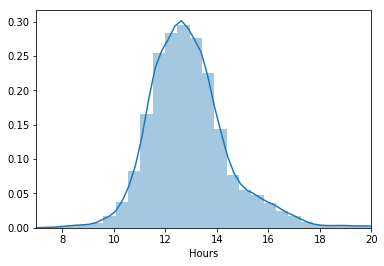

In [12]:
sns.distplot(newdf['Hours'])
plt.xlim(7, 20)

(1, 30)

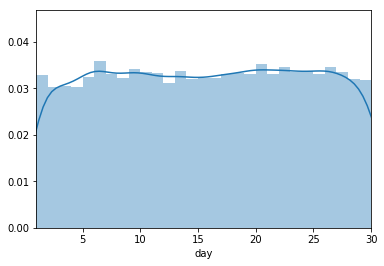

In [8]:
bins=np.arange(newdf['day'].min(), newdf['day'].max() + 1)
sns.distplot(newdf['day'], bins=bins)
plt.xlim(1, 30)

(0, 6)

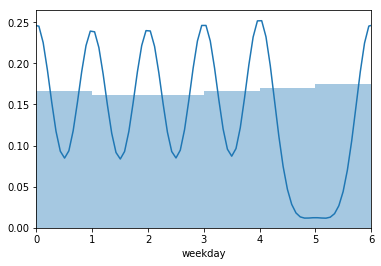

In [9]:
bins=np.arange(newdf['weekday'].min(), newdf['weekday'].max() + 1)
sns.distplot(newdf['weekday'], bins= bins)
plt.xlim(0, 6)

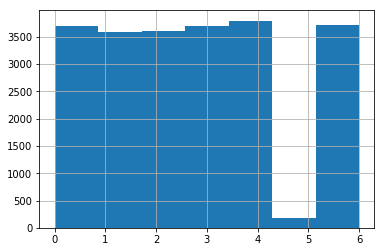

In [10]:
newdf['weekday'].hist(bins=7)

In [6]:
import xlrd
mydf2 = pd.read_excel(r"C:\Users\Thomas.Zoellinger\Downloads\MYDF2.xlsx")

c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\li

In [23]:
mydf2.head()

,Unnamed: 0,Author,Author2,Hauptartikel,Hauptartikel_clean,Hauptartikel_lem,Hauptartikel_lem_clean_no_stop,Hauptartikel_lemm_clean,Link,Loc1,Loc2,Loc3,Loc4,Old,Ort,Sekundaerer Ort,Timestamp,Ueberschrift,Ueberschrift_clean,Ueberschrift_clean2,Ueberschrift_kombi,Ueberschrift_lem,Ueberschrift_lem2,Ueberschrift_lem_clean2,Ueberschrift_lem_clean_no_stop,Ueberschrift_lem_no_stop,Ueberschrift_split,Year,Comb_all,Topic_LSI_Update 11,Prob_LSI_Update 11,Topic_LSI_Update 12,Prob_LSI_Update 12,Sentiment,gallusviertel,unterliederbach,griesheim,hauptbahnhof,bahnhofsviertel,innenstadt,eschersheim,rödelheim,bahnhofsgebiet,zeilsheim,sindlingen,höchst,nordend,ostend,niederrad,praunheim,dornbusch,bockenheim,kalbach,flughafen,hausen,westend,preungesheim,ginnheim,sachsenhausen,heddernheim,goldstein,seckbach,nordweststadt,oberrad,bonames,nied,sossenheim,eckenheim,gutleutviertel,riederwald,niederursel,nieder-eschbach,bornheim,schwanheim,stadtgebiet,fechenheim,nieder-erlenbach,bergen-enkheim,berkersheim,altstadt,gallus,autobahn,niedereschbach,frankfurter-berg,offenbach,bundesstraße,bundesautobahn,riedberg,harheim,Locs
0,0,NaN,manfred füllhardt,Frankfurt - Nordend: Wohnungsbrand Im 2. Obergeschoß eines fünfgeschos...,frankfurt nordend wohnungsbrand im obergeschoß eines fünfgeschossigen ...,frankfurt norden wohnungsbrand im obergeschoß ein fünfgeschossigen...,"['norden', 'wohnungsbrand', 'obergeschoß', 'fünfgeschossigen', 'mehrfamilien...",frankfurt norden wohnungsbrand im obergeschoß ein fünfgeschossigen...,https://www.presseportal.de/blaulicht/pm/4970/126458\n,NaN,NaN,NaN,NaN,False,nachmittagsmeldung,zum,2000-03-31 15:15:00,nachmittagsmeldung zum polizeibericht vom ..,nachmittagsmeldung zum polizeibericht vom,nachmittags meldung polizei bericht,"['meldung', 'nachmittagsmeldung', 'polizeibericht', 'bericht', 'nachmittags']",nachmittagsmeldung zum polizeibericht vom,nachmittags meldung polizei bericht,nachmittags meldung polizei bericht,nachmittags meldung bericht,nachmittagsmeldung polizeibericht,Nachmittags Meldung Polizei Bericht,2000,norden wohnungsbrand obergeschoß fünfgeschossigen mehrfamilienhauses rotteck...,3,0.910565,3,0.908879,-0.566667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,
1,1,NaN,manfred füllhardt,"Hofheim: Räuberische Erpressung Am 07.05.2000, gegen 08.10 Uhr, betrat e...",hofheim räuberische erpressung am gegen uhr betrat ein bislang unbeka...,hofheim räuberische erpressung am gegen uhr betreten einen bisla...,"['hofheim', 'räuberische', 'erpressung', 'betreten', 'unbekannt', 'täter', '...",hofheim räuberische erpressung am gegen uhr betreten einen bisla...,https://www.presseportal.de/blaulicht/pm/4970/136153\n,NaN,NaN,NaN,NaN,False,nachmittagsmeldung,pol.,2000-05-07 12:10:00,"nachmittagsmeldung pol. ffm. sonntag, ..",nachmittagsmeldung pol ffm sonntag,nachmittags meldung pol ffm,"['meldung', 'nachmittagsmeldung', 'pol', 'nachmittags', 'ffm']",nachmittagsmeldung pol ffm sonntag,nachmittags meldung pol ffm,nachmittags meldung pol ffm,nachmittags meldung pol ffm,nachmittagsmeldung pol ffm,Nachmittags Meldung Pol Ffm,2000,hofheim räuberische erpressung betreten unbekannt täter sonnenstudio straße ...,10,0.303492,10,0.300349,-0.500000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,
2,2,NaN,NaN,"Heute Abend, dem 27.06.2000, gegen 20.00 Uhr wurde im Frankfurter Stadtteil...",heute abend dem gegen uhr wurde im frankfurter stadtteil gallus ein co...,heute abend der gegen uhr werde

In [22]:
loc_list = mydf2["Loc1"].dropna().unique().tolist()
mydf2["Locs"] = mydf2["Loc1"].fillna('') + " " + mydf2["Loc2"].fillna('') + " " + mydf2["Loc3"].fillna('') + " " + mydf2["Loc4"].fillna('')
for cityName in loc_list:
    mydf2.loc[:, cityName] = mydf2.Locs.apply(lambda x: cityName in x)
d = []
for cityName in loc_list:
    d.append({"City": cityName, "Sentiment":np.mean(mydf2[mydf2[cityName]].Sentiment.tolist()), "Count": sum(mydf2[cityName])} )
d = pd.DataFrame(d)

In [33]:
dataset = mydf2
loc_list = dataset["Loc1"].dropna().unique().tolist()
dataset["Locs"] = dataset["Loc1"].fillna('') + " " + dataset["Loc2"].fillna('') + " " + dataset["Loc3"].fillna('') + " " + dataset["Loc4"].fillna('')
for cityName in loc_list:
    dataset.loc[:, cityName] = dataset.Locs.apply(lambda x: cityName in x)
d = []
for cityName in loc_list:
    d.append({"City": cityName, "Sentiment":np.mean(dataset[dataset[cityName]].Sentiment.tolist()), "Count": sum(dataset[cityName])} )
d = pd.DataFrame(d)

In [ ]:
loc_list = dataset["Loc1"].dropna().unique().tolist()
dataset["Locs"] = dataset["Loc1"].fillna('') + " " + dataset["Loc2"].fillna('') + " " + dataset["Loc3"].fillna('') + " " + dataset["Loc4"].fillna('')
dataset


In [31]:
d = []
for cityName in loc_list:
    d.append({"City": cityName, "Sentiment":np.mean(mydf2[mydf2[cityName]].Sentiment.tolist()), "Count": sum(mydf2[cityName])} )
d = pd.DataFrame(d)
d

,City,Count,Sentiment
0,gallusviertel,380,-0.423852
1,unterliederbach,266,-0.401297
2,griesheim,560,-0.373443
3,hauptbahnhof,67,-0.433224
4,bahnhofsviertel,877,-0.392110
5,innenstadt,1828,-0.367173
6,eschersheim,384,-0.344728
7,rödelheim,452,-0.370973
8,bahnhofsgebiet,402,-0.366120
9,zeilsheim,188,-0.368925


(0, 3.5)

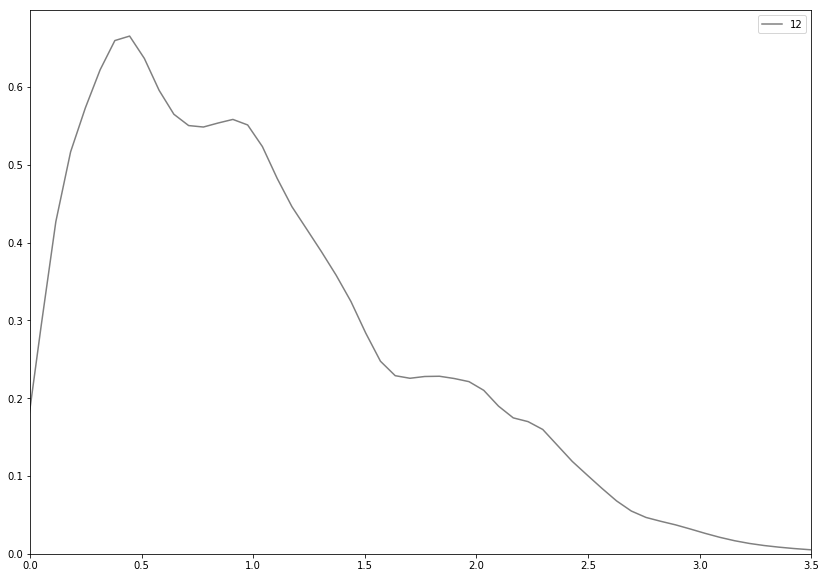

In [113]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (14,10)
#sns.kdeplot( mydf2["Prob_LSI_Update 11"] , color="pink", label="11")
sns.kdeplot( mydf2["Prob_LSI_Update 12"] , color="grey", label="12")
#sns.kdeplot( mydf2["Prob_LSI_Update 13"] , color="brown", label="13")
#sns.kdeplot( mydf2["Prob_LSI_Update 14"] , color="black", label="14")
plt.xlim(0, 3.5)

In [114]:
for i in range(12,13):
    print(str(i) + "   " + str(mydf2["Prob_LSI_Update "+str(i)].mean()))

12   1.0234682825058499


In [3]:
for i in range(10, 14):
    print(i)

10
11
12
13


In [ ]:
##Topic Mapping

In [117]:
mydf2 = mydf2.fillna(value="")
def get_top_words(column):
    return pd.Series(' '.join(column).lower().split()).value_counts()[:6].index.tolist()
topics = pd.DataFrame(mydf2.groupby(['Topic_LSI_Update 12'])['Ueberschrift_lem_no_stop'].apply(get_top_words))

In [137]:
topics

,Ueberschrift_lem_no_stop
Topic_LSI_Update 12,
0,"[verkehrsunfall, schwer, verletzen, unfall, tödlich, fußgänger]"
1,"[raub, straßenraub, versucht, raubüberfall, raubstraftat, kiosk]"
2,"[geschwindigkeitsmessungen, geschwindigkeitskontrollen, kontrollmaßnahmen, k..."
3,"[wohnungsbrand, wohnungseinbruch, verletzen, schaden, sachschaden, wohnungse..."
4,"[festnehmen, festnahme, einbrecher, diebstahl, trickdiebstahl, festnahmen]"
6,"[versucht, tötungsdelikt, handtaschenraub, überfall, totschlag, festnahme]"
7,"[brand, pkw, brandstiftung, verdenken, feuer, küchenbrand]"
8,"[trickdiebstahl, falsch, pforten, veranstaltungshinweis, handwerker, pfleged..."
9,"[festnahme, pkw, einbruch, stehlen, aufbruch, drogenszene]"


In [138]:
topics.to_csv(r"../Resources/Topics_Words.csv",
                     sep=";",
                     encoding="UTF-16",
                     header=True,
                     quotechar='"',
                     index=True)


In [124]:
##Sentiment Analysis

In [125]:
from textblob_de import TextBlobDE as TextBlob
blob = TextBlob("Am gestrigen Donnerstagnachmittag waren eine 82-jährige Frau und ihre 85 Jahre alte Schwester auf dem Nachhauseweg von der Bushaltestelle Am Industriehof, als in der Elbinger Straße ein Radfahrer sich den beiden Damen von hinten näherte. Im Vorbeifahren gelang es dem Täter die Handtasche der 82-Jährigen zu ergreifen und trotz heftiger Gegenwehr zu entreißen. Der radelnde Räuber flüchtete mit seiner Beute in Richtung Rosittener Straße. Eine Täterbeschreibung konnte von den beiden älteren Damen nicht abgegeben werden, er wurde jedoch auf ein Alter von 18  20 Jahren geschätzt. Bei dem Raubgut handelt es sich um eine schwarze Lederhandtasche mit Lebensmitteln, Arznei und RMV-Monatskarte. Bargeld befand sich zu Glück nicht in der Handtasche. Zeugen des Vorfalls werden gebeten, sich mit der sachbearbeitenden Dienststelle bzw. dem Kriminaldauerdienst unter der Tel-Nr. 069/755- 54210 oder mit der nächsten Polizeidienststelle in Verbindung zu setzen")
blob.sentiment[0]


0.38571428571428573

In [67]:
def get_sentiment(text):
    """
    :param text: Input Text
    :return: Sentiment for Text
    """
    return TextBlob(text).sentiment[0]

In [74]:
print(mydf2["Hauptartikel_clean"][1:5])
mydf2["Hauptartikel_clean"][1:5].apply(get_sentiment)

1     hofheim  räuberische erpressung am   gegen   uhr  betrat ein bislang unbeka...
2     heute abend  dem   gegen   uhr wurde im frankfurter stadtteil gallus ein co...
3     mit verkehrsbehinderungen in den nächten des   und   august   müssen die ve...
4     im rahmen einer kleiner feier ehrt am   um   uhr in seinen diensträumen pol...
Name: Hauptartikel_clean, dtype: object


1    0.100000
2   -0.342857
3   -0.080000
4    0.280000
Name: Hauptartikel_clean, dtype: float64

In [272]:
#Safe as Excel
newdf.to_excel(r"C:\Users\Thomas.Zoellinger\Downloads\MYDF1.xlsx")

In [274]:
newdf["Hauptartikel_lem_clean_no_stop"] =newdf["Hauptartikel_lem_clean_no_stop"] .apply(getElement)
newdf["Ueberschrift_kombi"] =newdf["Ueberschrift_kombi"] .apply(getElement)

In [275]:
def getWordsCount(Col,Num):
    return pd.Series(' '.join(Col).lower().split()).value_counts()[:Num]

In [276]:
newdf_author = newdf[newdf["Author"].isin(["as", "em", "fue", "ka", "mc", "ne", "re", "va", "we"])]
grouped =newdf_author.groupby(['Author'],group_keys=False )

In [280]:
author_words = round(grouped["Hauptartikel_lemm_clean"].apply(getWordsCount, Num=200) / grouped["Hauptartikel_lemm_clean"].count(),2)

In [283]:
Word_Freq_Author = pd.DataFrame(author_words).unstack()
Word_Freq_Author.dropna(thresh=len(Word_Freq_Author) - 3, axis=1)

Hauptartikel_lemm_clean                                      \
                             a    ab   als   alt    am    an ander   
Author                                                               
as                        0.18   NaN  0.52  0.28  1.07  0.79  0.23   
em                        0.23  0.11  0.57  0.31  0.77  1.28  0.26   
fue                       1.83   NaN  0.39  0.22  1.06  0.69  0.10   
ka                        0.20  0.13  0.51  0.37  0.94  0.82  0.14   
mc                        0.11  0.12  0.64  0.29  1.06  0.83  0.19   
ne                        0.10  0.10  0.72  0.36  0.67  0.77  0.15   
re                        0.28  0.15  0.22  0.95  0.65  0.82  0.14   
va                         NaN  0.09  0.44  0.51  0.85  0.76  0.15   
we                        0.18   NaN  0.39  0.47  1.02  0.67  0.31   

                                                                           \
       anschließen  auch   auf   aus  auto   bab bargeld beamten befinden   
Author                                                                      
as            0.09  0.24  1.13  0.56   NaN  0.08    0.11    0.17      NaN   
em            0.25  0.32  1.53  0.48  0.12  0.38    0.13    0.25      NaN   
fue            NaN  0.35  1.11  0.59   NaN  1.90    0.12    0.11     0.22   
ka            0.31  0.19  1.84  0.56  0.26  0.18    0.21    0.45     0.16   
mc             NaN  0.28  1.61  0.66   NaN  0.14    0.11    0.27     0.09   
ne            0.29  0.49  1.17  0.73  0.18   NaN    0.18    0.48      NaN   
re            0.11  0.46  1.42  0.68  0.10  0.32    0.15     NaN     0.17   
va            0.19  0.21  1.27  0.71  0.10   NaN    0.16     NaN     0.14   
we            0.26  0.43  1.43  0.61  0.13  0.36    0.28    0.18     0.15   

                                                                              \
         bei  beid beschreiben beute   bis bislang bleiben    cm dabei  dass   
Author                                                                         
as      0.63  0.44        0.14  0.11  0.24    0.19    0.12   NaN  0.13  0.26   
em      0.43  0.54         NaN   NaN  0.26    0.15    0.11  0.12  0.29  0.50   
fue     0.45  0.28        0.15   NaN  0.10    0.24     NaN  0.19  0.32  0.20   
ka      0.53  0.33        0.25  0.18  0.39     NaN    0.11  0.32  0.11  0.29   
mc      0.55  0.23        0.14  0.09  0.17    0.12     NaN   NaN  0.10  0.33   
ne      0.56  0.54        0.13  0.10  0.16    0.13    0.11  0.16  0.23  0.35   
re      0.67  0.30         NaN   NaN  0.34    0.16    0.12  0.16  0.23  0.30   
va      0.56  0.50        0.09  0.09  0.35     NaN    0.11  0.37  0.25  0.23   
we      0.75  0.50         NaN  0.13  0.34    0.18    0.12  0.34  0.12  0.24   

                                                                         \
          der  dies  dort  drei dunkel durch   ein einen einer entgegen   
Author                                                                    
as      12.04  0.46  0.09  0.23   0.08  0.19  0.75  2.32  1.54     0.09   
em      16.86  0.76  0.22  0.24   0.11  0.25  0.90  2.75  1.91     0.22   
fue     12.77  0.49  0.33  0.14   0.14  0.32  0.75  2.24  1.17      NaN   
ka      16.27  0.82  0.22  0.23   0.25  0.43  0.97  2.56  1.27     0.31   
mc      14.76  0.58  0.09  0.22   0.13  0.34  1.05  2.38  1.82      NaN   
ne      15.80  0.57   NaN  0.27   0.13  0.33  1.07  2.52  1.48     0.10   
re      15.40  0.46  0.15  0.15    NaN  0.48  1.07  2.38  1.70     0.18   
va      13.04  0.52  0.19  0.19   0.29  0.27  1.12  2.92  1.81     0.31   
we      14.53  0.40   NaN  0.19   0.19  0.31  0.91  2.46  1.85     0.13   

                                                                          \
       ermittlungen  etwa  euro fahren fahrer fahrzeug festnehmen finden   
Author                                                                     
as             0.17  0.38  0.45   0.11   0.17      NaN       0.18   0.17   
em             0.68  0.32  0.32   0.18   0.24     0.24       0.32   0.14   

In [2]:
for i in range(11,13):
    print(i)

11
12
